<a href="https://colab.research.google.com/github/patricio-tech/proyectos/blob/master/Pytorch-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torchvision

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
EPOCHS = 10 
BATCH_SIZE= 64

In [3]:
xy_trainPT = torchvision.datasets.MNIST(root='./data', train=True, download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])) 
xy_trainPT_loader = torch.utils.data.DataLoader(xy_trainPT, batch_size=BATCH_SIZE)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


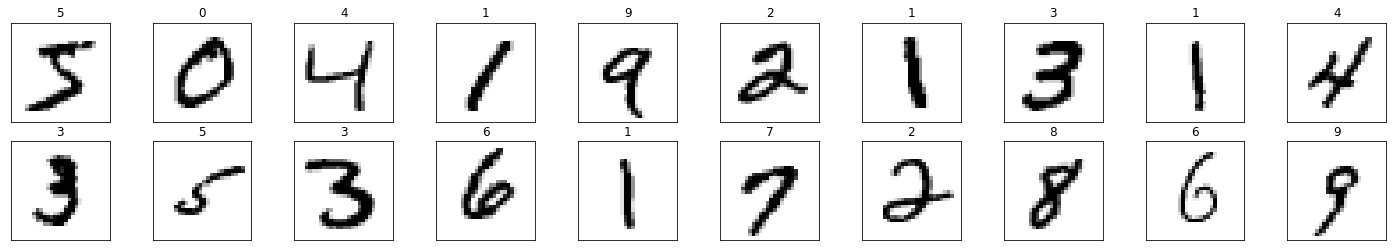

In [4]:
fig = plt.figure(figsize=(25, 4)) 
for idx in np.arange(20):
   image, label = xy_trainPT [idx]
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   ax.imshow(torch.squeeze(image, dim = 0).numpy(), cmap=plt.cm.binary)
   ax.set_title(str(label))

In [5]:
image, _ = xy_trainPT [0] 
print(image.size())
image_flatten = image.view(image.shape[0], -1)
print (image_flatten.size())

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [6]:
a = torch.randn(2, 3)
print(a)

tensor([[-1.4724, -0.7163,  0.4286],
        [ 0.2197, -0.0170, -1.5270]])


In [7]:
print(a.size())
print(a.dim())

torch.Size([2, 3])
2


In [8]:
matrix=torch.zeros([2, 4], dtype=torch.int32)
print(matrix)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)


In [9]:
print(matrix.dtype)

torch.int32


In [10]:
b = torch.zeros(2, 3)
print(b)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [11]:
c = torch.ones(2, 3)
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [12]:
c[0,0]=222 
print(c)

tensor([[222.,   1.,   1.],
        [  1.,   1.,   1.]])


In [13]:
x = torch.Tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) 
print (x)
print ("x column 1: ", x[:, 1])
print ("x row 0: ", x[0, :])
print ("x rows 0,1 & cols 1,2: \n", x[0:2, 1:3])

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
x column 1:  tensor([ 2.,  6., 10.])
x row 0:  tensor([1., 2., 3., 4.])
x rows 0,1 & cols 1,2: 
 tensor([[2., 3.],
        [6., 7.]])


In [14]:
x = np.array([[1,2], [3,4], [5,6]])
print (x)

[[1 2]
 [3 4]
 [5 6]]


In [15]:
y=torch.from_numpy(x)
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [16]:
z = y.numpy()
print (z)

[[1 2]
 [3 4]
 [5 6]]


In [17]:
one_d = torch.arange(0,16)
print (one_d)
two_d= one_d.reshape(4,4)
print (two_d)
print(two_d.size())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
torch.Size([4, 4])


In [18]:
modelPT= torch.nn.Sequential(            
         torch.nn.Linear(784,10),
         torch.nn.Sigmoid(), 
         torch.nn.Linear(10,10), 
         torch.nn.LogSoftmax(dim=1) 
         )

In [19]:
criterion = torch.nn.NLLLoss()

In [20]:
optimizer = torch.optim.SGD(modelPT.parameters(), lr=0.01)

In [21]:
for e in range(EPOCHS):
    running_loss = 0
    for images, labels in xy_trainPT_loader:
        images = images.view(images.shape[0], -1)
        output = modelPT(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(xy_trainPT_loader)))

Epoch 0 - Training loss: 2.2010560917701802
Epoch 1 - Training loss: 1.9397764561781243
Epoch 2 - Training loss: 1.6431451624136235
Epoch 3 - Training loss: 1.37927566459184
Epoch 4 - Training loss: 1.1754294930617692
Epoch 5 - Training loss: 1.0266663656433
Epoch 6 - Training loss: 0.9174496659846194
Epoch 7 - Training loss: 0.8343275036893165
Epoch 8 - Training loss: 0.7686649606998033
Epoch 9 - Training loss: 0.7152402031142066


In [22]:
xy_testPT = torchvision.datasets.MNIST(root='./data', train=False, download=True, 
            transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
xy_test_loaderPT = torch.utils.data.DataLoader(xy_testPT)
correct_count, all_count = 0, 0
for images,labels in xy_test_loaderPT:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    logps = modelPT(img)
    ps = torch.exp(logps)
    probab = list(ps.detach().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
print("\nAccuracy of the model =",(correct_count/all_count))


Accuracy of the model = 0.8482
